# Machine Learning - Auto Fuel Efficiency

We'll try to see how properties of car impacts fuel efficiency.

Data for the project is hosted at [University of California - Irvine repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

In [26]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
# Getting column names from data/auto-mpg.names file
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]

cars = pd.read_table("data/auto-mpg.data.txt", delim_whitespace=True, names=columns)
cars.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


** Let's find which columns correlates to fuel effeciency. **

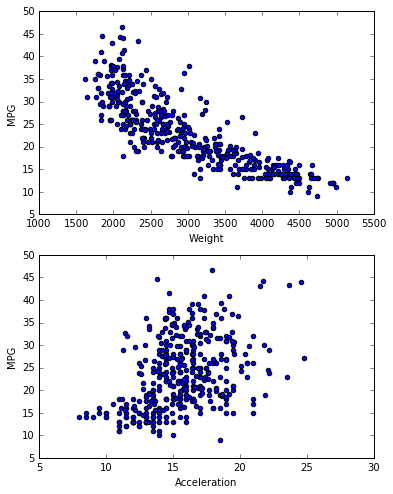

In [28]:
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(cars["weight"], cars["mpg"])
ax1.set(xlabel="Weight", ylabel="MPG")

ax2.scatter(cars["acceleration"], cars["mpg"])
ax2.set(xlabel="Acceleration", ylabel="MPG")

plt.show()

There's a strong negative linear relationship between the weight and mpg columns and a weak, positive linear relationship between the acceleration and mpg columns.

** Let's try and fit linear regression model. **

In [29]:
lr = LinearRegression()
lr.fit(cars[["weight"]], cars[["mpg"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

With this trained model, we can start making predictions.

In [30]:
predictions = lr.predict(cars[["weight"]])
predictions[:5]
cars["mpg"][:5]

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

With the new predictions, we can now plot actual fuel efficiency values to the predicted values.

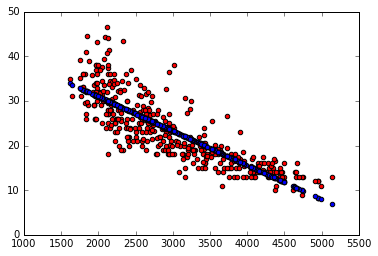

In [31]:
plt.scatter(cars["weight"], cars["mpg"], c='red')
plt.scatter(cars["weight"], predictions, c='blue')

As can be seen from the plot, our model performs well linearly. At the same time, we need to calculate model's **error**.

### Mean Squared Error

In [32]:
mse = mean_squared_error(cars[["mpg"]], predictions)
mse

18.780939734628394

### Root Mean Squared Error

In [33]:
rmse = mse ** (1/2)
rmse

4.3336981591509574

## Exploring horsepower's effect on fuel efficiency

First we need to get rid of rows with values '?'

In [34]:
filtered_cars = cars[cars['horsepower'] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

/Users/aniruddhabarapatre1/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


We can start plotting values now to find correlations.

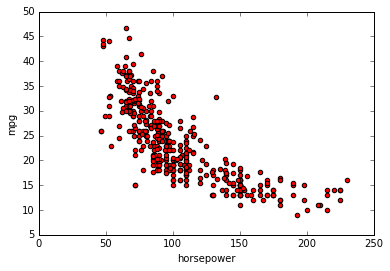

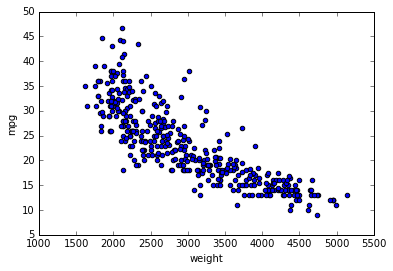

In [35]:
filtered_cars.plot('horsepower', 'mpg', kind='scatter', c='red')
filtered_cars.plot('weight', 'mpg', kind='scatter', c='blue')
plt.show()

There seems be some correlation between car's horsepower and it's fuel efficiency. Let's fit a linear regression model to get better understanding

In [36]:
lr = LinearRegression()
lr.fit(filtered_cars[["horsepower"]], filtered_cars[["mpg"]])

predictions = lr.predict(filtered_cars[["horsepower"]])
predictions[0:5]
filtered_cars["mpg"][0:5].values

array([ 18.,  15.,  18.,  16.,  17.])

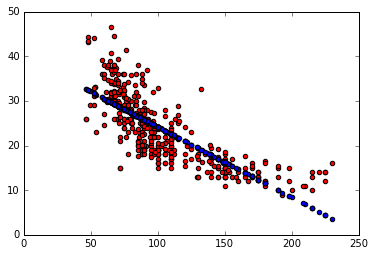

In [37]:
plt.scatter(filtered_cars["horsepower"], filtered_cars["mpg"], c='red')
plt.scatter(filtered_cars["horsepower"], predictions, c='blue')
plt.show()

In [39]:
mse = mean_squared_error(filtered_cars[["mpg"]], predictions)
print(mse)

rmse = mse ** (1/2)
print(rmse)

23.9436629386
4.89322623007


|      |Weight  |Horsepower|
|:----:|:------:|:--------:|
|MSE   |18.78   |23.94     |
|RMSE  |4.33    |4.98      |

Based of the outputs from two models we should definately use **weights model** due to low values of **MSE** and **RMSE**.